# Основные библиотеки Python для анализа данных. Линейная регрессия.

В этой тетрадке мы познакомимся с базовыми библиотеками для анализа данных на примере задачи прогнозирования роста человека по его весу.

## Анализ данных c Pandas

Сперва импортируем необходимые библиотеки

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
# %matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Считаем данные по росту и весу (*weights_heights.csv*, приложенный в задании) в объект Pandas DataFrame:

In [2]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

Посмотрим какую размерность имеют данные и посмотрим первые несколько записей

In [4]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (25000, 2)


,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
6,68.69784,123.3024
7,69.80204,141.4947
8,70.01472,136.4623
9,67.90265,112.3723


Построим гистограмму распределения признаков

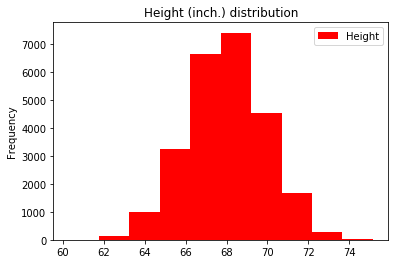

In [6]:
data.plot(y='Height', kind='hist', 
           color='red',  title='Height (inch.) distribution')

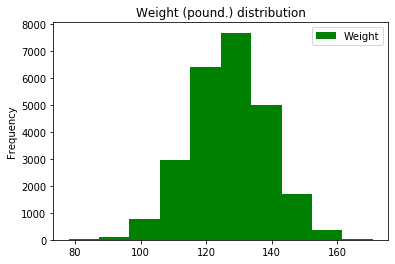

In [7]:
data.plot(y='Weight', kind='hist',
         color='green', title='Weight (pound.) distribution')

Построим картинку, на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' друг от друга.

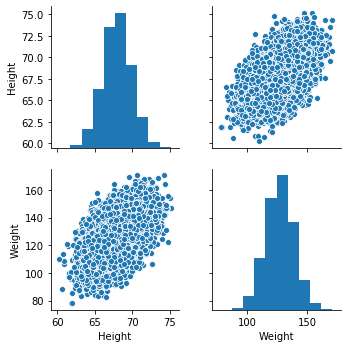

In [9]:
figsize(13, 7)
sns.pairplot(data)

Посмотрим на корреляцию между признаками, используя матрицу корреляций Пирсона

In [7]:
data.corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


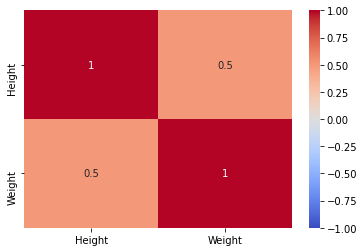

In [8]:
sns.heatmap(data.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

## Разделим выборку на обучающую(train) и тестовую(test)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data[['Weight']], data[['Height']], test_size=0.33)

## Применим алгоритм линейной регрессии к задаче

Обучим модель линейной регрессии на обучающей выборке и воспользуемся ей для предсказаний на тестовой выборке

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [14]:
predictions, y_test

(array([[68.69024376],
        [67.2507911 ],
        [67.12382403],
        ...,
        [65.5707242 ],
        [69.18261055],
        [68.45456805]]),          Height
 Index          
 7504   69.61605
 2197   67.36943
 4037   67.89972
 860    67.92486
 15238  65.62406
 ...         ...
 8677   68.54650
 14617  69.33763
 19872  67.14367
 20822  68.54449
 17183  69.33350
 
 [8250 rows x 1 columns])

Вычислим точность предсказаний по метрикам

In [15]:
mean_squared_error(predictions, y_test["Height"])

2.713701890469566

Мы можем посмотреть коэффициенты модели

In [17]:
w_0 = model.intercept_
w_1 = model.coef_[0]
print("w_0 = ", w_0)
print("w_1 = ", w_1)

w_0 =  [57.50710418]
w_1 =  [0.08254263]


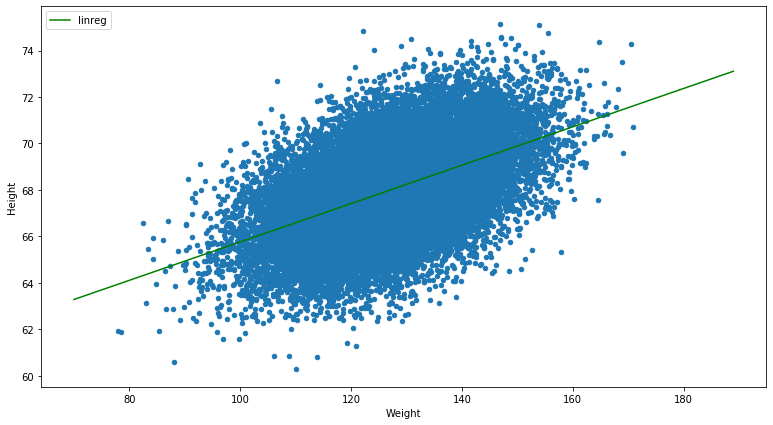

In [18]:
def line(w0, w1, x):
    return w0 + w1 * x

x = np.linspace(70, 189, 1000)
y_1 = line(w_0, w_1, x)

data.plot(x='Weight', y='Height', kind='scatter')
plt.plot(x, y_1, label='linreg', color='g')
# plt.plot(x, y_2, label='(w0,w1)=(50, 0.16)', color='b')

plt.ylabel('Height')
plt.xlabel('Weight')
plt.legend(loc='upper left')
